In [18]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator


In [6]:

pd.options.mode.chained_assignment = None  # default='warn'  #to suppress SettingWithCopyWarning

#Reading the dataset
dataset = pd.read_csv("../input/fer20131.csv")

#Obtaining train data where usage is "Training"
train = dataset[dataset["Usage"] == "Training"]

#Obtaining test data where usage is "PublicTest"
test = dataset[dataset["Usage"] == "PublicTest"]

#Converting " " separated pixel values to list
train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

In [8]:
X_train = train.iloc[:, 1].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1].values
y_test = test.iloc[:, 0].values

'''
np.vstack stack element in sequence vertically (eg: [2, 3, 4] --> array([[2],
                                                                         [3],
                                                                         [4]])
                                               )
'''
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)


In [9]:
#Reshape X_train, y_train,X_test,y_test in desired formats
X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

In [11]:
print("shape of X_train and y_train is " + str(X_train.shape) + str(y_train.shape))
print("shape of X_test and y_test is " + str(X_test.shape) + str(y_test.shape))

shape of X_train and y_train is (28709, 48, 48, 1)(28709, 1)
shape of X_test and y_test is (3589, 48, 48, 1)(3589, 1)


In [12]:
# Change to float datatype
train_data = X_train.astype('float32')
test_data = X_test.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

In [13]:
# Find the unique numbers from the train labels

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [15]:
#Defining labels 

def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

## Plotting images

Text(0.5, 1.0, 'Ground Truth : Surprise')

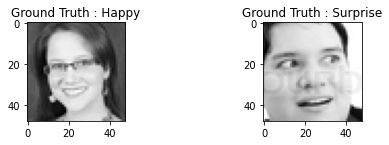

In [27]:
# resize plots
plt.figure(figsize=[6,4])

# Display random image from training data
plt.subplot(1,3,1)
plt.imshow(np.squeeze(X_train[7]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[7]))))

# Display random image from testing data
plt.subplot(1,3,3)
plt.imshow(np.squeeze(X_test[1500]), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_test[1500]))))

In [28]:
def createModel():
    
    #Model Initialization
    model = Sequential() 
    
    #Adding Input Layer
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    
    #Adding more layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    #Flattening
    model.add(Flatten())
    
    #Adding fully connected layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    
    #Adding Output Layer
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [31]:
datagen = ImageDataGenerator()

In [32]:
model = createModel()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 256
epochs = 20

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
113/113 [==============================] - 170s 2s/step - loss: 1.7998 - accuracy: 0.2563 - val_loss: 1.6559 - val_accuracy: 0.3670
Epoch 2/20
113/113 [==============================] - 172s 2s/step - loss: 1.6046 - accuracy: 0.3783 - val_loss: 1.4862 - val_accuracy: 0.4296
Epoch 3/20
113/113 [==============================] - 174s 2s/step - loss: 1.4782 - accuracy: 0.4307 - val_loss: 1.3804 - val_accuracy: 0.4790
Epoch 4/20
113/113 [==============================] - 191s 2s/step - loss: 1.3776 - accuracy: 0.4723 - val_loss: 1.2959 - val_accuracy: 0.5085
Epoch 5/20
113/113 [==============================] - 168s 1s/step - loss: 1.2993 - accuracy: 0.5055 - val_loss: 1.2468 - val_accuracy: 0.5230
Epoch 6/20
113/113 [==============================] - 203s 2s/step - loss: 1.2384 - accuracy: 0.5310 - val_loss: 1.2359 - val_accuracy: 0.5311
Epoch 7/20
113/113 [==============================] - 186s 2s/step

In [34]:
model.evaluate(test_data, test_labels_one_hot)

113/113 [==============================] - 5s 41ms/step - loss: 1.0880 - accuracy: 0.6177


[1.087967038154602, 0.6177208423614502]

KeyError: 'acc'

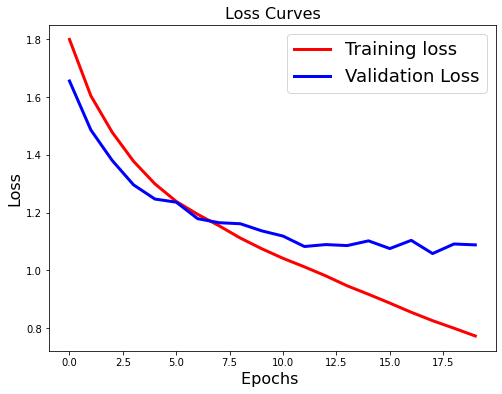

<Figure size 576x432 with 0 Axes>

In [36]:
#Plotting accuracy and loss curves for 1st model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

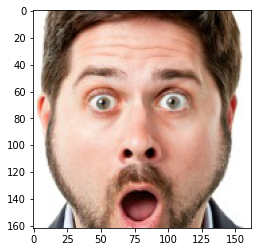

In [109]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
img = Image.open("surprise.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(np.asarray(img), 1.3, 5)
for (x, y, w, h) in faces:
    cropped_img = img.crop((x,y,x+w,y+h))
plt.imshow(cropped_img)

In [113]:
#Resizing image to required size and processing
test_image = cropped_img.resize((48,48),Image.ANTIALIAS)
test_image = np.array(test_image)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#scale pixels values to lie between 0 and 1 because we did same to our train and test set
gray = gray/255

#reshaping image (-1 is used to automatically fit an integer at it's place to match dimension of original image)
gray = gray.reshape(-1, 48, 48, 1)

res = model.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res)

print("Probabilities are " + str(res[0])+"\n")
print("Emotion is "+get_label(result_num))

Probabilities are [1.1338723e-03 2.4818903e-06 3.1777408e-03 1.3588429e-05 4.5576085e-06
 9.9566758e-01 1.5385758e-07]

Emotion is Surprise


## Pre-Training

In [98]:
from keras.models import load_model
pretrained_model = load_model("../input/fer2013_mini_XCEPTION.110-0.65.hdf5")

In [112]:
#Resizing image to required size
test_image = cropped_img.resize((64,64),Image.ANTIALIAS)

#Converting image to array
test_image = np.array(test_image)

#converting to grayscale
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#scale pixels values to lie between 0 and 1 because we did same to our train and test set
gray = gray/255

#reshaping image (-1 is used to automatically fit an integer at it's place to match dimension of original image)
gray = gray.reshape(-1, 64, 64, 1)

res = pretrained_model.predict(gray)

#argmax returns index of max value
result_num = np.argmax(res[0])

# print predictions
print("\nProbabilities are " + str(res[0])+"\n")
print("Emotion is "+ get_label(result_num))


Probabilities are [2.8591100e-03 1.4888286e-07 5.8742952e-02 4.0186474e-06 5.4096885e-04
 9.3783683e-01 1.6024218e-05]

Emotion is Surprise
